In [1]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
read_files = glob.glob(os.path.join("KT19_20200124_*.dat"))
array = []
for files in read_files:
    data = pd.read_csv(files, header = 0)
    array.append(data)
#    print(files)
merge_values = np.vstack(array)
df_KT19 = pd.DataFrame(merge_values) 
df_KT19.to_csv('data_KT19.csv', header=None,index=False)
KT19_22_jan = pd.read_csv('data_KT19.csv', delim_whitespace=True, header=None)
KT19_22_jan.columns = ['date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
hour = [] 
for i in KT19_22_jan.hours:
    hour.append('{:02}'.format(i))
hour = pd.DataFrame(hour)
KT19_22_jan= pd.concat([hour,KT19_22_jan], axis = 1)
Min = [] 
for i in KT19_22_jan.minutes:
    Min.append('{:02}'.format(i))
Min = pd.DataFrame(Min)
KT19_22_jan= pd.concat([Min,KT19_22_jan], axis = 1)
KT19_22_jan.columns = ['Min','hour','date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
KT19_22_jan['time'] = KT19_22_jan.date.astype(str).str.cat(KT19_22_jan[['hour','Min','seconds']].astype(str))
KT19_22_jan["time"]= KT19_22_jan["time"].astype(str) 
KT19_22_jan
#KT19_22_jan.to_csv('KT19_22_jan.csv')
# my_date = []
# for m in KT19_22_jan.time:
#     date = datetime.strptime(m, "%Y%m%d%H%M%S.%f")
#     my_date.append(date)
# my_date = pd.DataFrame(my_date)
# KT19_22 = pd.concat([my_date,KT19_22_jan.temperature,KT19_22_jan.time,KT19_22_jan.instrument_temp], axis = 1)
# KT19_22.columns = ['datetime', 'temperature','time','instrument_temp']
# plt.figure(figsize=(15,6),dpi=500)
# plt.plot(KT19_22.datetime,KT19_22.temperature, 'g', label = 'surface temperature')
# plt.plot(KT19_22.datetime,KT19_22.instrument_temp, 'b', label = 'instrument temperature')
# plt.xticks(fontsize=12, rotation=45)
# plt.yticks(fontsize=12, rotation=45)
# plt.legend()
# plt.show()

,Min,hour,date,hours,minutes,seconds,temperature,calibration_factor_1,calibration_factor_2,instrument_temp,time
0,24,08,20200124,8,24,30.44,297.30,1.0,0.3,298.35,20200124082430.44
1,24,08,20200124,8,24,30.49,297.26,1.0,0.3,298.35,20200124082430.49
2,24,08,20200124,8,24,30.54,297.24,1.0,0.3,298.35,20200124082430.54
3,24,08,20200124,8,24,30.59,297.25,1.0,0.3,298.35,20200124082430.59
4,24,08,20200124,8,24,30.64,297.28,1.0,0.3,298.35,20200124082430.64
...,...,...,...,...,...,...,...,...,...,...,...
154395,45,18,20200124,18,45,4.91,314.52,1.0,0.3,300.67,2020012418454.91
154396,45,18,20200124,18,45,5.11,314.55,1.0,0.3,300.67,2020012418455.11
154397,45,18,20200124,18,45,5.36,314.68,1.0,0.3,300.67,2020012418455.36
154398,45,18,20200124,18,45,5.56,314.62,1.0,0.3,300.67,2020012418455.56


In [28]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(41249)

[11, 27, 29]

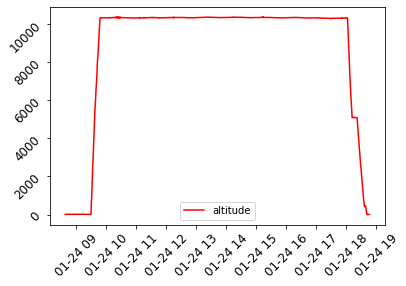

In [4]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
navigation = pd.read_csv('Nav_GPSPos0000.Asc', skiprows=10, delim_whitespace = True, header = None)
navigation
navigation.iloc[:,[1,4]]
import datetime
start = datetime.datetime(2020, 1, 24, 8, 37, 52)
end = datetime.datetime(2020, 1, 24, 18, 47, 2)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_big = pd.concat([df_time_delta, navigation.iloc[:,4:5]], axis=1)
df_big.dropna(inplace =True)
df_big.columns = ['Time','Altitude']
plt.plot(df_big.Time,df_big.Altitude, 'r', label = 'altitude')
#plt.plot(df_big.Time,df_big.Altitude,'b', label = 'altitude')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.legend()
plt.show()

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'center '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


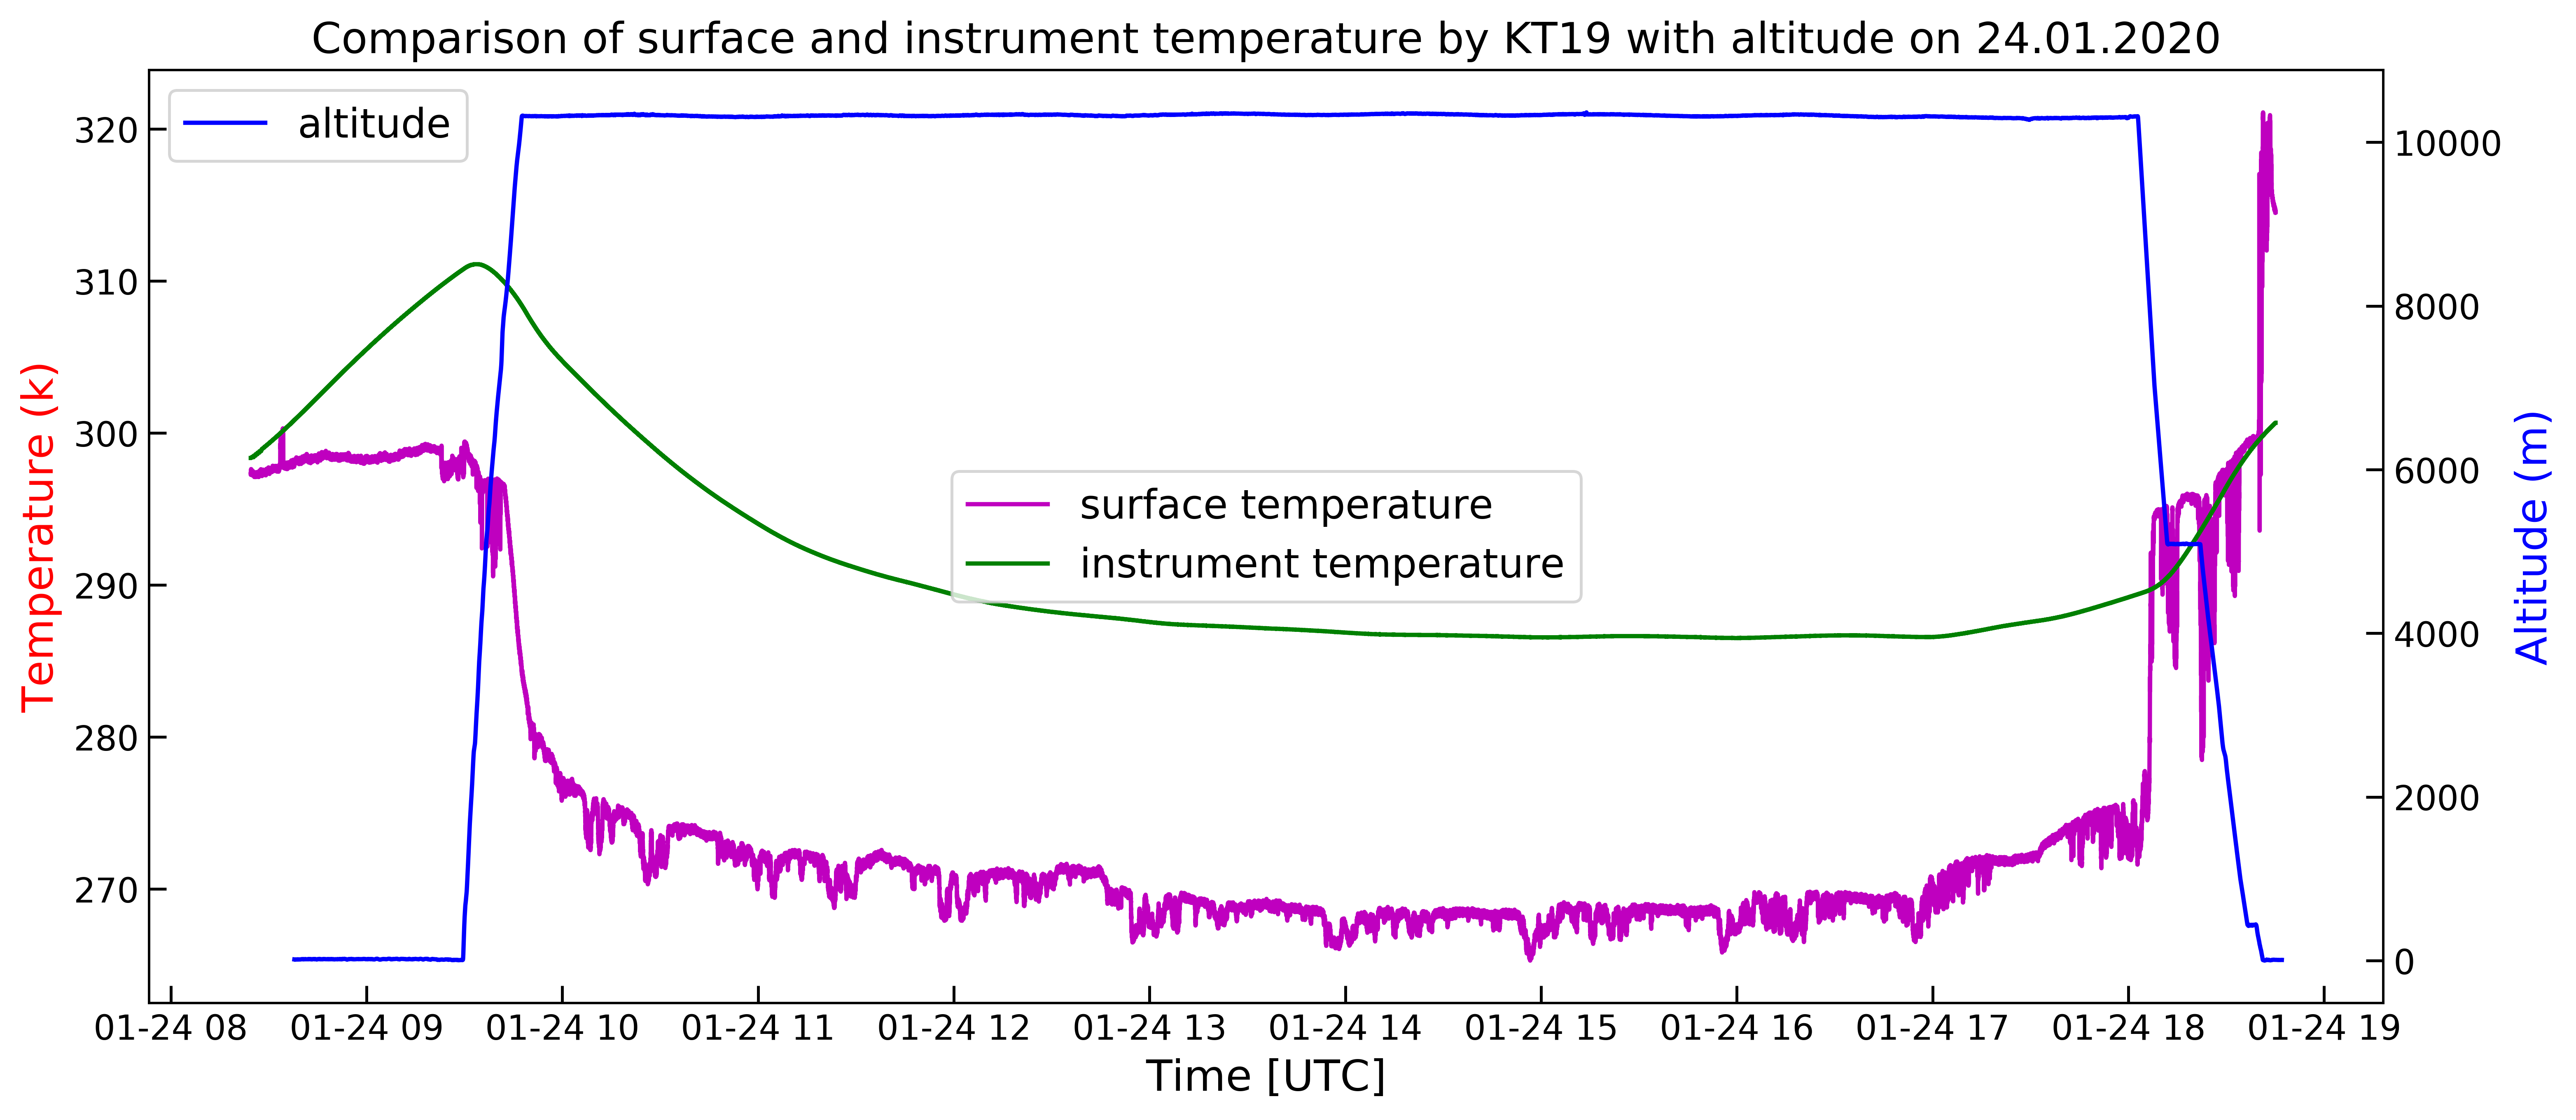

In [31]:
fig, ax1 = plt.subplots(figsize=(14,6),dpi=500)
ax2 = ax1.twinx()
ax1.tick_params(direction='in', length=6, width=1, colors='k',
                grid_color='k', grid_alpha=0.5)
ax2.tick_params(direction='in', length=6, width=1, colors='k',
                grid_color='k', grid_alpha=0.5)
#ax2.set_xticklabels(xticklabels, fontsize=7)
ax1.xaxis.set_tick_params(labelsize=12)
ax2.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax1.plot(KT19_22.datetime,KT19_22.temperature, 'm', label = 'surface temperature')
ax1.plot(KT19_22.datetime,KT19_22.instrument_temp, 'g', label = 'instrument temperature')
ax2.plot(df_big.Time,df_big.Altitude, 'b-', label= 'altitude')
ax1.set_xlabel('Time [UTC]',fontsize = 15)
ax1.set_ylabel('Temperature (k)', color='r',fontsize = 15)
ax2.set_ylabel('Altitude (m)', color='b',fontsize = 15)
ax1.legend(fontsize=14, loc = 'upper left')
plt.title('Comparison of surface and instrument temperature by KT19 with altitude on 24.01.2020', fontsize=15)
ax1.legend(fontsize=14, loc = 'center')
ax2.legend(fontsize=14, loc = 'center ')
# ax1.set_ylim(260,340)
# ax2.set_ylim(0,12000)
plt.show()

In [6]:
#alt_temp = KT19_22_jan.loc[:,['time']]
b = KT19_22_jan['time'].astype(str).str.split('.')
seconds = []
for i,j in b:
    seconds.append(i)
second = pd.DataFrame(seconds)
second.columns=['second']
second.reset_index(drop=True)
df = pd.concat([KT19_22_jan,second],axis=1)
#df['time'] = df.date.astype(str).str.cat(df[['hours','minutes','second']].astype(str))
df1 = df.loc[:,['second','instrument_temp']]
KT= df1.groupby('second')['instrument_temp'].mean()
KT.to_csv('temp_24-01-20.csv')

C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]


In [7]:
temp_24 = pd.read_csv('temp_24-01-20.csv', header=None, names = ['date','temp'])
temp_24


,date,temp
0,20200124082430,298.350000
1,20200124082431,298.350000
2,20200124082432,298.350000
3,20200124082433,298.355789
4,20200124082434,298.360000
...,...,...
37225,2020012418451,300.650000
37226,2020012418452,300.660000
37227,2020012418453,300.660000
37228,2020012418454,300.666667


In [10]:
df = df_big.drop(df_big.index[36437:36550])
df

,Time,Altitude
0,2020-01-24 08:37:52,14.581
1,2020-01-24 08:37:53,14.642
2,2020-01-24 08:37:54,14.395
3,2020-01-24 08:37:55,13.950
4,2020-01-24 08:37:56,13.318
...,...,...
36433,2020-01-24 18:45:05,9.514
36434,2020-01-24 18:45:06,9.402
36435,2020-01-24 18:45:07,9.462
36436,2020-01-24 18:45:08,9.590


ValueError: x and y must be the same size

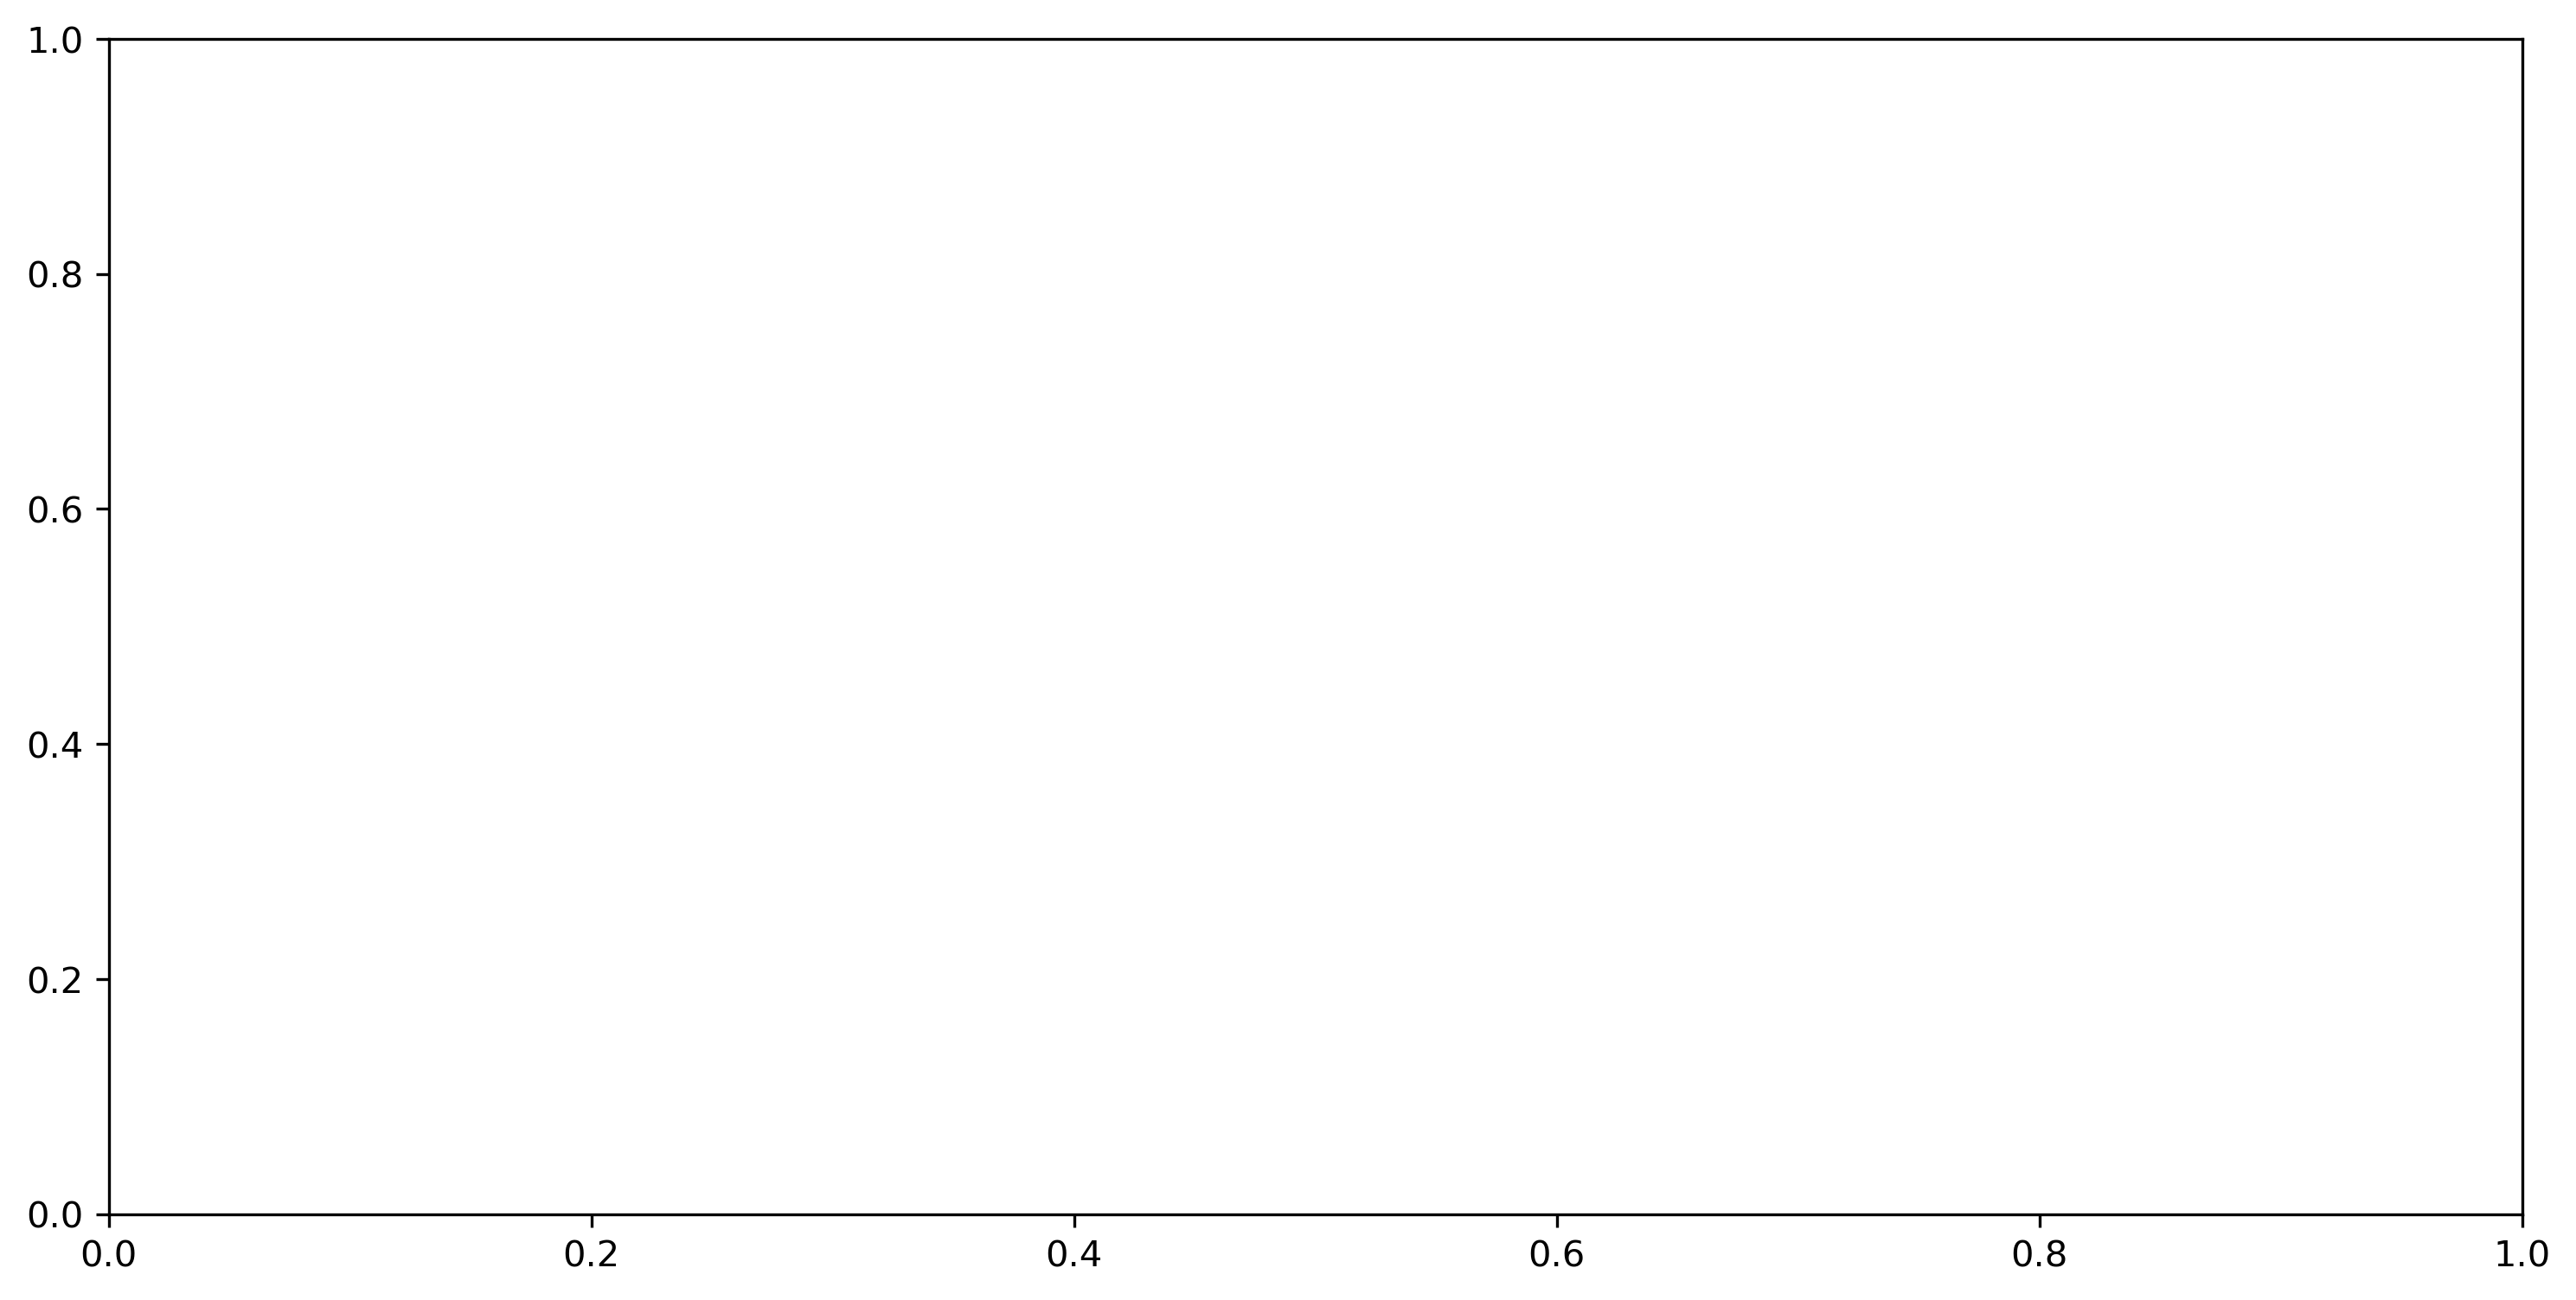

In [11]:
fig, ax1 = plt.subplots(figsize=(12,6),dpi=300)
plt.scatter(temp_24.temp, df.Altitude, label='skitscat', color='purple', s=1, marker="o")
plt.ylabel ('Altitude (m)', fontsize = 12)
plt.xlabel('Brightness Temperature (k)', fontsize = 12)
plt.show()
    

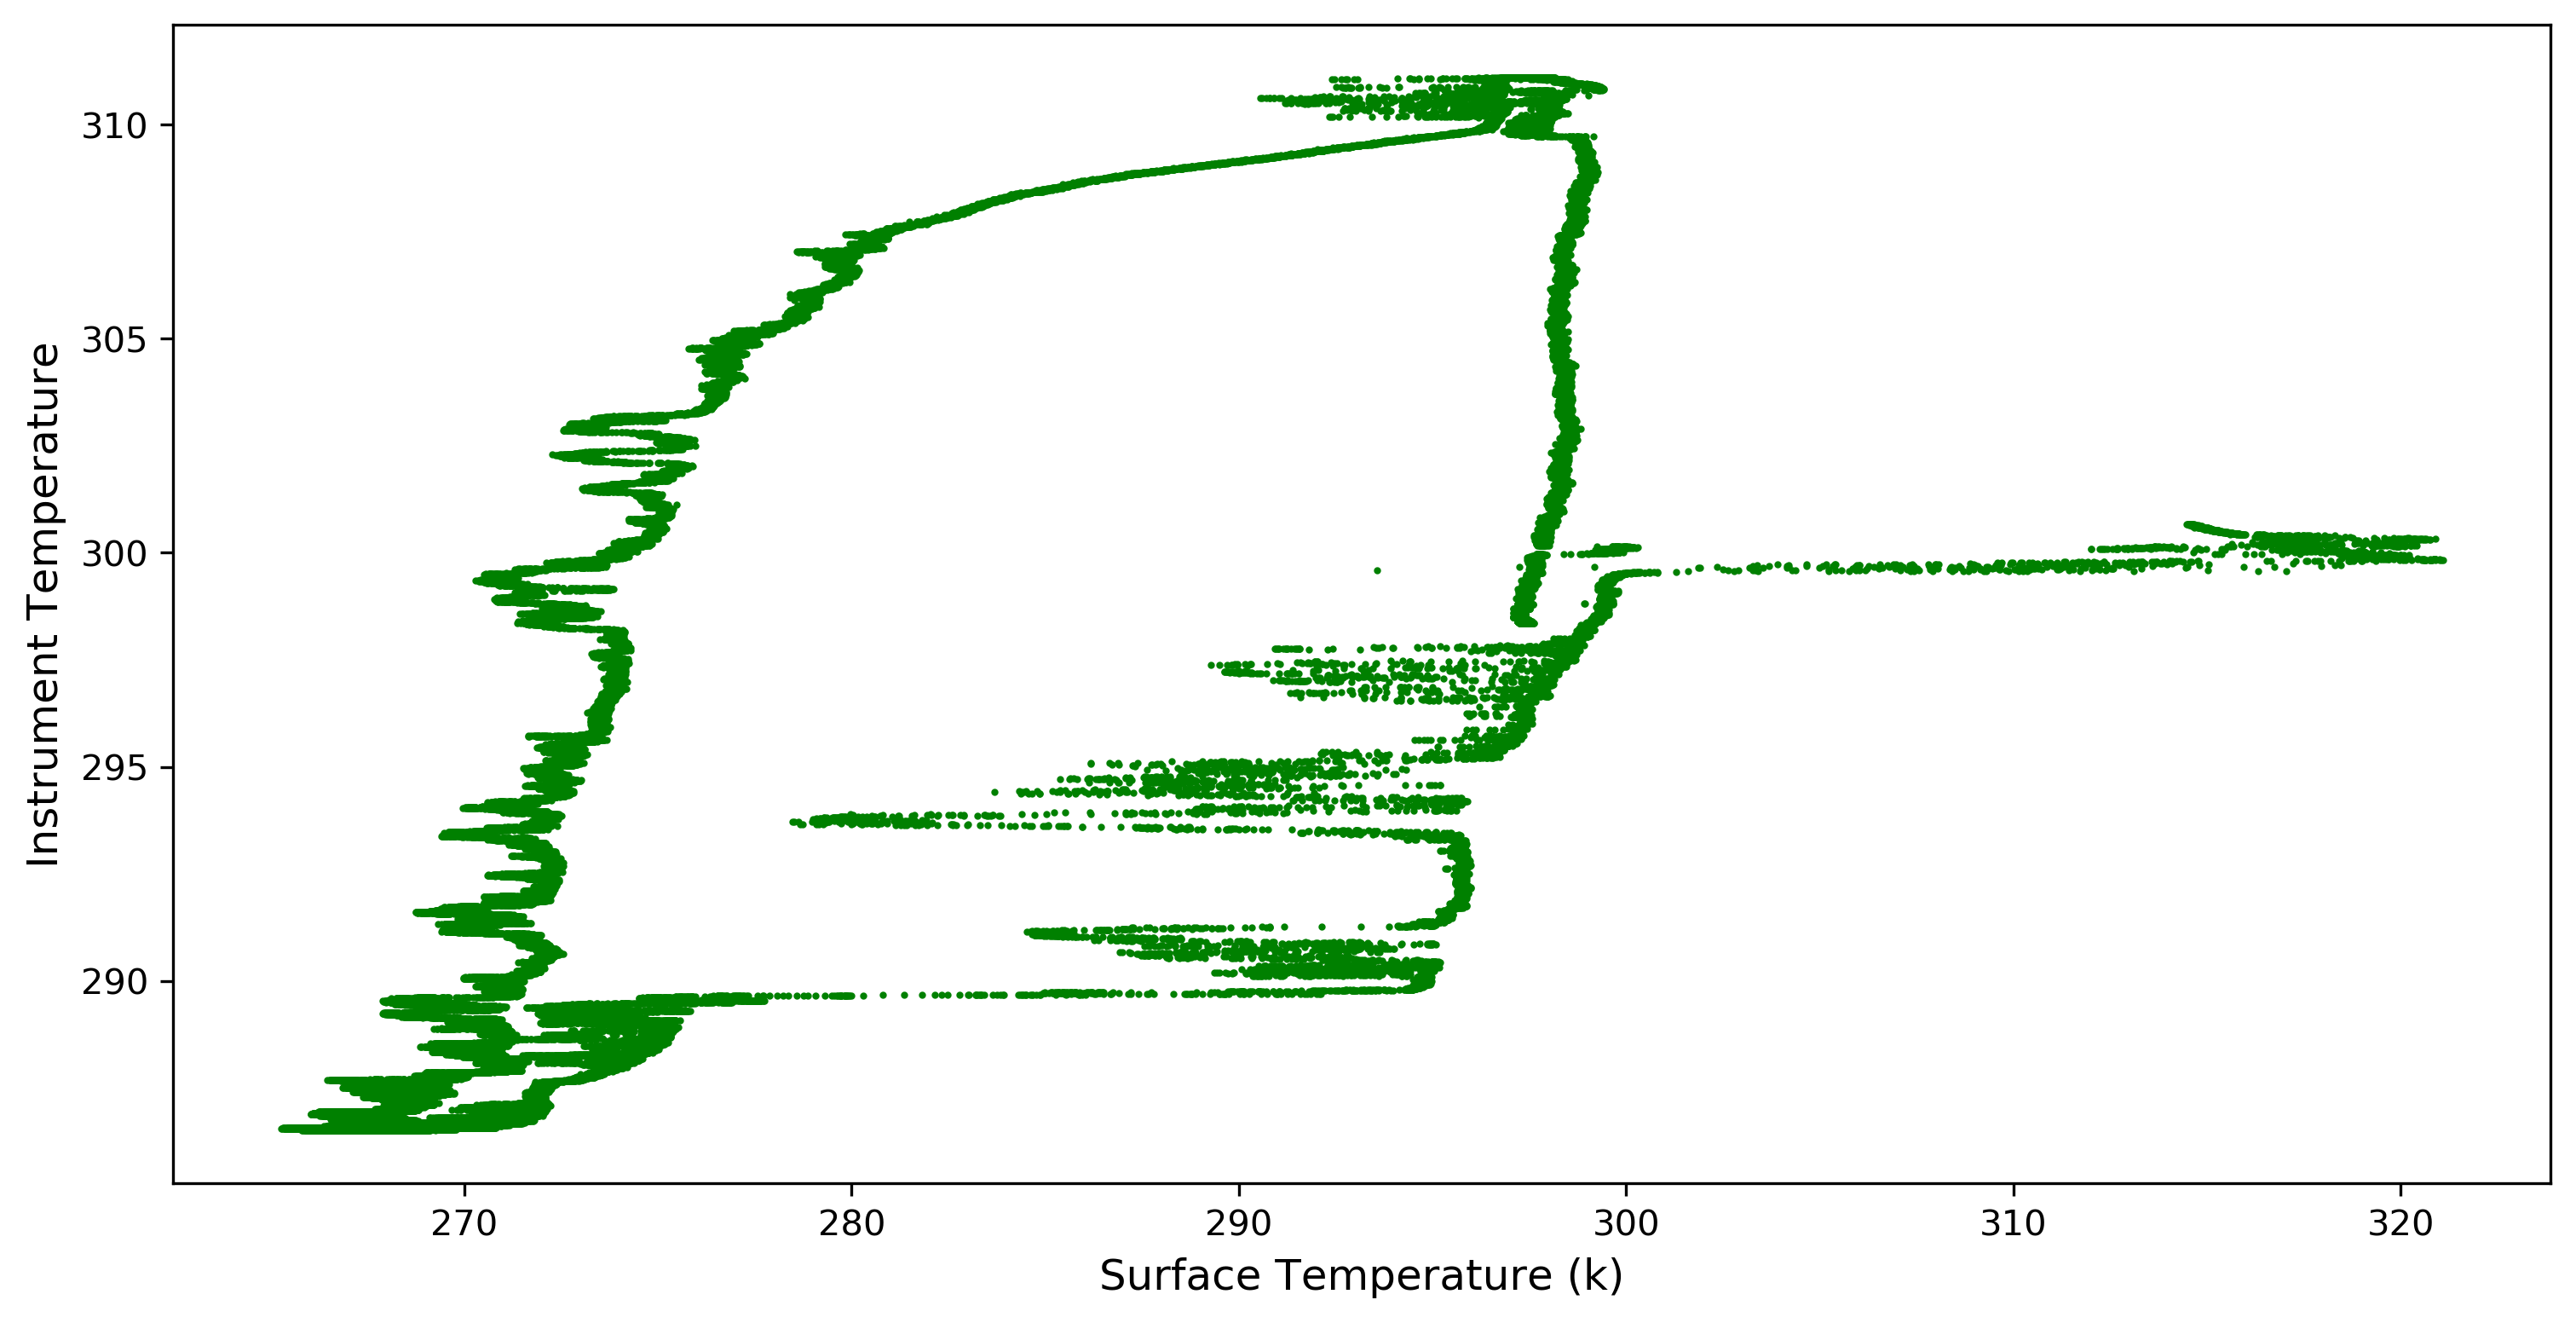

In [12]:
fig, ax1 = plt.subplots(figsize=(12,6),dpi=300)
plt.scatter(KT19_22_jan.temperature, KT19_22_jan.instrument_temp, label='skitscat', color='green', s=1, marker="o")
plt.ylabel ('Instrument Temperature', fontsize = 12)
plt.xlabel('Surface Temperature (k)', fontsize = 12)
plt.show()
    

In [29]:
from scipy.stats.stats import pearsonr
docs_col = KT19_22_jan['temperature'].values
energy_col = KT19_22_jan['instrument_temp'].values
corr , _ = pearsonr(docs_col, energy_col)
corr

0.7927728470310613

,temperature,instrument_temp
0,297.30,298.35
1,297.26,298.35
2,297.24,298.35
3,297.25,298.35
4,297.28,298.35
...,...,...
154395,314.52,300.67
154396,314.55,300.67
154397,314.68,300.67
154398,314.62,300.67


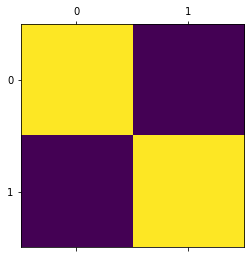

In [15]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

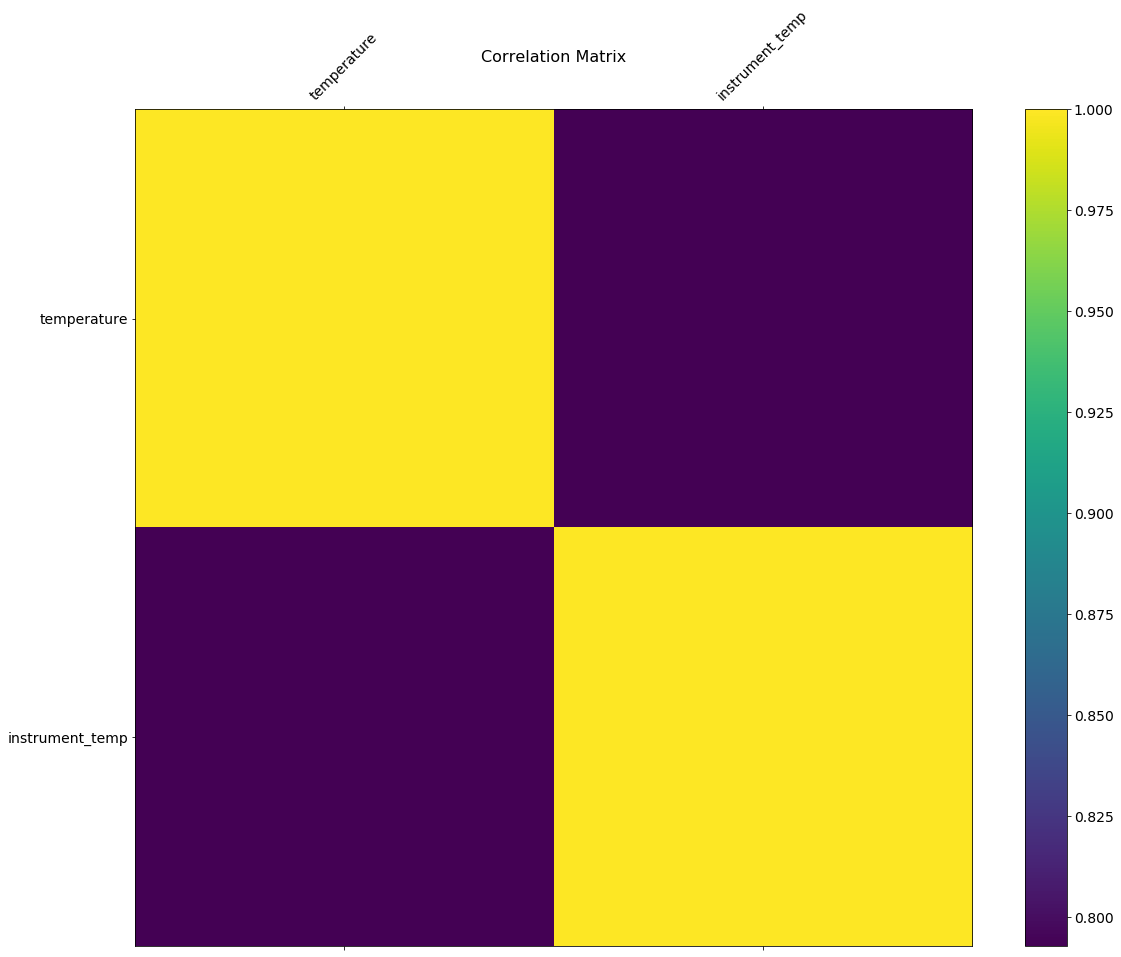

In [16]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [18]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


In [20]:
df = KT19_22_jan.loc[:,['temperature','instrument_temp']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,temperature,instrument_temp
temperature,1,0.792773
instrument_temp,0.792773,1


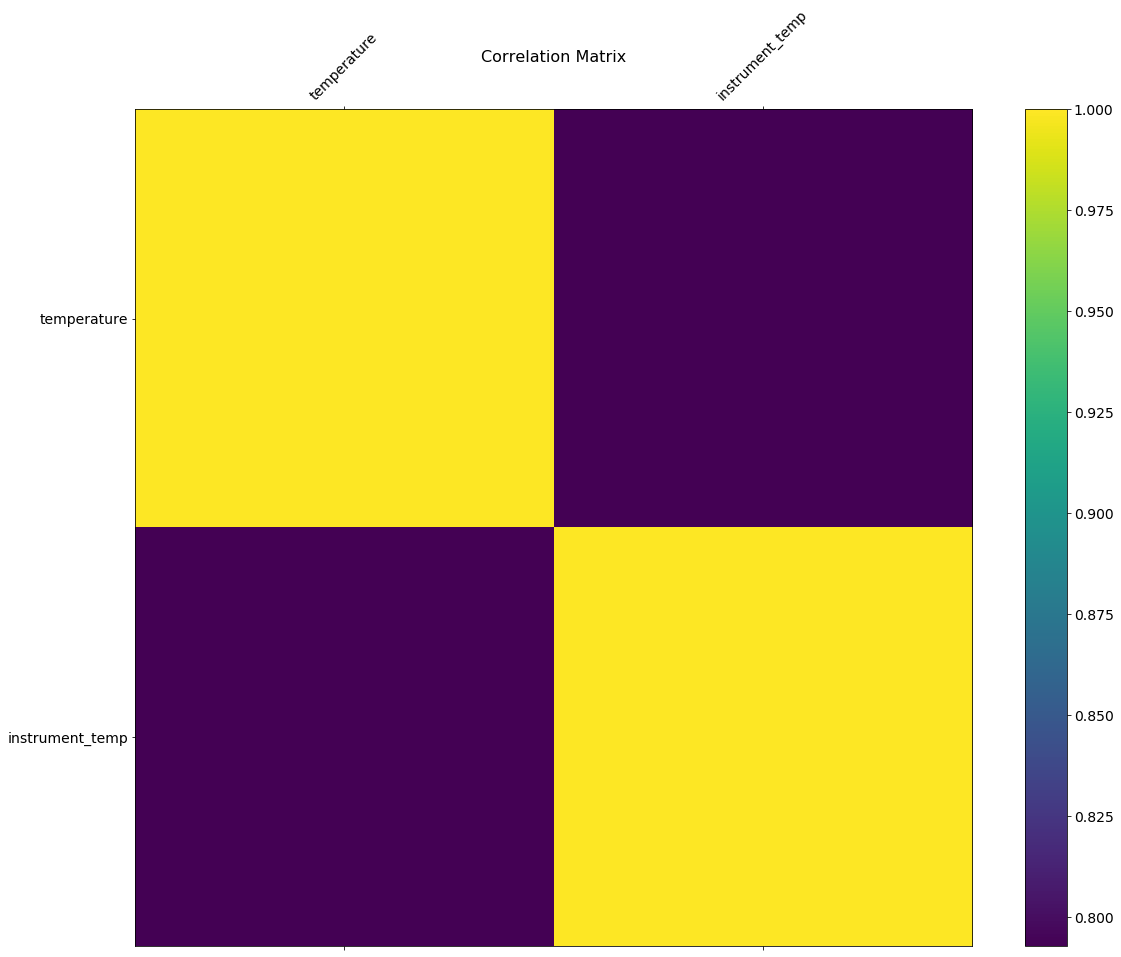

In [21]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [23]:
df.describe()

,temperature,instrument_temp
count,154400.000000,154400.000000
mean,275.922497,292.155668
std,11.406635,7.335557
min,265.280000,286.500000
25%,268.610000,286.690000
50%,271.010000,288.170000
75%,275.080000,296.460000
max,321.090000,311.100000


In [27]:
df.corr()

,temperature,instrument_temp
temperature,1.000000,0.792773
instrument_temp,0.792773,1.000000


In [3]:
import numpy as np
np.arange(4,20)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])